# Practica de Machine Learning
## Estudio completo de un problema de ML con Python
### Tarea:

Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles.

Vamos a utilizar **DataFrames** de [Pandas](http://pandas.pydata.org/). Como es sabido, Pandas es un módulo de python de código abierto para el análisis de datos, que proporciona estructuras de datos fáciles de utilizar.

In [1]:
# Cargamos las librerias de Pandas
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Carga de datos y división train/test

In [2]:
# cargamos fichero
airbnb_df = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';', decimal='.')
print(airbnb_df.shape)
# visualizamos 5 primeras filas
airbnb_df.head(15).T                             

(14780, 89)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ID,11210388,17471131,17584891,5398030,18104606,15695269,1295958,1349311,15698621,6766647,13531067,9474923,17471207,15459188,13184463
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606,https://www.airbnb.com/rooms/15695269,https://www.airbnb.com/rooms/1295958,https://www.airbnb.com/rooms/1349311,https://www.airbnb.com/rooms/15698621,https://www.airbnb.com/rooms/6766647,https://www.airbnb.com/rooms/13531067,https://www.airbnb.com/rooms/9474923,https://www.airbnb.com/rooms/17471207,https://www.airbnb.com/rooms/15459188,https://www.airbnb.com/rooms/13184463
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170306202425,20170402075052,20170512105218,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-07,2017-04-02,2017-05-12,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II,55. Valencia II Apartment,3 BR + 2 baths near the beach!!,Room & bathroom @ Sagrada Familia,98. Enamorats,"5 Minutes to Downtown, Zilker!","AMSTERDAM, OUD-WEST",Sunny&cozy flat in residential area,"Jasmine Terrace, Friendly Rentals",Paseo De Gracia I (433),"Rooftop 2 terraces full of art, style and views"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible,strict,strict,flexible,strict,strict,moderate,strict,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0,92.0,1.0,1.0,92.0,1.0,1.0,1.0,106.0,92.0,1.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN,NaN,1.22,0.64,0.33,0.06,0.63,0.43,NaN,0.39,0.99
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616","41.3825366724,2.14957707323","41.3990576554,2.18422942312","41.4023570187,2.17111908017","41.407356343,2.18298158055","30.2871239485,-97.7681636129","52.3666787119,4.86559494384","51.2047587311,4.40372918318","41.3944612013,2.16153861565","41.3916158892,2.16816770612","41.3813686756,2.18087435147"


In [3]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

He revisado el dataset, voy a eliminar las columnas que considero que no aportan nada, como ID y las que contienen URL (ids, URLs, etc) .

In [4]:
# Elimino las columnas ID y URL 
airbnb_df = airbnb_df.drop(['ID','Scrape ID','Listing Url','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Thumbnail Url',
                             'Host Picture Url'], axis=1)
airbnb_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-07
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II,55. Valencia II Apartment,3 BR + 2 baths near the beach!!,Room & bathroom @ Sagrada Familia,98. Enamorats,"5 Minutes to Downtown, Zilker!"
Summary,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car...","Unique apartment in vibrant neighborhoods, car...",Spacious and quiet apartment that can accommod...,"FEBRUARY 6-10, entire apartment available - 2 ...","Unique apartment in vibrant neighborhoods, car...","Get everywhere in minutes! Charming, tradition..."
Space,This loft has a spectacular view of the hills ...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",You wake up to the sun rising over Barcelona's...,"License: HUTB-005313 Charming apartment, locat...",This fully refurbished apartment has 2 bedroom...,Its size allows to accommodate up to 6 people ...,Our apartment has been recently renovated pres...,Fantastic apartment located 7 minutes from the...,Located on a large tree-covered lot less than ...
Description,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car...","Unique apartment in vibrant neighborhoods, car...",Spacious and quiet apartment that can accommod...,"FEBRUARY 6-10, entire apartment available - 2 ...","Unique apartment in vibrant neighborhoods, car...","Get everywhere in minutes! Charming, tradition..."
...,...,...,...,...,...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible,strict,strict,flexible,strict,strict
Calculated host listings count,1.0,106.0,106.0,24.0,92.0,92.0,1.0,1.0,92.0,1.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN,NaN,1.22,0.64,0.33,0.06
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616","41.3825366724,2.14957707323","41.3990576554,2.18422942312","41.4023570187,2.17111908017","41.407356343,2.18298158055","30.2871239485,-97.7681636129"


He revisado el dataset, voy a eliminar las columnas que contienen cadenas de texto que no me aportan, como:  Name, Summary, Space, Description, Experiences Offered, Neighborhood Overview, Notes, Transit, Access, 
Interaction, House Rules, Host Name, Host Since, Host Location, Host About, Host Response Time, Host Acceptance Rate, Host Neighbourhood, Host Verifications, Street, Neighbourhood, Neighbourhood Cleansed, 
Neighbourhood Group Cleansed, State, Zipcode, Market, Smart Location, Country Code, Country, Property Type, Bed Type, Amenities, Calendar Updated, Has Availability, Calendar last Scraped, First Review, Last Review,
License, Jurisdiction Names, Cancellation Policy, Geolocation, Features

In [5]:
# Elimino las columnas con cadena de texto, que creo no me aportan.
airbnb_df = airbnb_df.drop(['Name','Last Scraped','Summary','Space','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Host Name','Host Since',
                                       'Host Location','Host About','Host Response Time','Host Acceptance Rate','Host Neighbourhood','Host Verifications','Street','Neighbourhood','Neighbourhood Cleansed',
                                        'State','Zipcode','Market','Smart Location','Country Code','Country','Property Type','Bed Type','Amenities','Calendar Updated','Has Availability',
                                       'Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Cancellation Policy','Geolocation','Features'], axis=1)
airbnb_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Host Response Rate,100.0,100.0,100.0,100.0,99.0,99.0,100.0,100.0,99.0,100.0
Host Listings Count,1.0,162.0,162.0,27.0,207.0,207.0,2.0,1.0,207.0,1.0
Host Total Listings Count,1.0,162.0,162.0,27.0,207.0,207.0,2.0,1.0,207.0,1.0
Neighbourhood Group Cleansed,NaN,Eixample,Eixample,Eixample,Eixample,Eixample,Eixample,Eixample,Sant Martí,NaN
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Austin
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685,41.382537,41.399058,41.402357,41.407356,30.287124
Longitude,-97.863277,2.172625,2.162173,2.167418,2.15515,2.149577,2.184229,2.171119,2.182982,-97.768164
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt
Accommodates,2,4,4,8,5,6,5,2,6,6
Bathrooms,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0


In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              12881 non-null  float64
 1   Host Listings Count             14777 non-null  float64
 2   Host Total Listings Count       14777 non-null  float64
 3   Neighbourhood Group Cleansed    13760 non-null  object 
 4   City                            14774 non-null  object 
 5   Latitude                        14780 non-null  float64
 6   Longitude                       14780 non-null  float64
 7   Room Type                       14780 non-null  object 
 8   Accommodates                    14780 non-null  int64  
 9   Bathrooms                       14725 non-null  float64
 10  Bedrooms                        14755 non-null  float64
 11  Beds                            14731 non-null  float64
 12  Square Feet                     

# El método train_test_split

## Divido entre train y test.

Tenemos un unico fichero .csv, y uso la función para obtener dos subconjuntos: train y test, en dos archivos dististos .csv.

In [7]:
from sklearn.model_selection import train_test_split

#airbnb_df = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';', decimal='.')
train, test = train_test_split(airbnb_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_train_df = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')
airbnb_train_df.head()

Dimensiones del dataset de training: (11824, 36)
Dimensiones del dataset de test: (2956, 36)


,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Group Cleansed,City,Latitude,Longitude,Room Type,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,100.0,2.0,2.0,Retiro,Madrid,40.407732,-3.684819,Entire home/apt,4,1.0,...,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,2.0,0.50
1,100.0,1.0,1.0,Centro,Madrid,40.415802,-3.705340,Entire home/apt,4,1.0,...,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,1.0,2.43
2,100.0,16.0,16.0,Carabanchel,Madrid,40.389048,-3.740374,Shared room,1,1.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
3,100.0,114.0,114.0,Centro,Madrid,40.412814,-3.703052,Private room,2,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN
4,100.0,2.0,2.0,Chamberí,Madrid,40.438631,-3.713716,Private room,2,1.0,...,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,2.0,2.08


In [8]:
airbnb_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              10317 non-null  float64
 1   Host Listings Count             11821 non-null  float64
 2   Host Total Listings Count       11821 non-null  float64
 3   Neighbourhood Group Cleansed    11006 non-null  object 
 4   City                            11820 non-null  object 
 5   Latitude                        11824 non-null  float64
 6   Longitude                       11824 non-null  float64
 7   Room Type                       11824 non-null  object 
 8   Accommodates                    11824 non-null  int64  
 9   Bathrooms                       11780 non-null  float64
 10  Bedrooms                        11804 non-null  float64
 11  Beds                            11787 non-null  float64
 12  Square Feet                     

In [9]:
airbnb_train_df.describe()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [10]:
airbnb_train_df['City'].value_counts()

City
Madrid              10567
Barcelona             235
London                104
Paris                  85
Palma                  44
                    ...  
Hong Kong               1
San Fernando            1
Tsim Sha Tsui           1
Beverly Hills           1
Aravaca (Madrid)        1
Name: count, Length: 222, dtype: int64

In [11]:
# Filtrar los registros donde la columna 'City' es 'Madrid'
airbnb_train_df = airbnb_train_df[airbnb_train_df['City'] == 'Madrid']

In [12]:
airbnb_train_df['City'].value_counts()

City
Madrid    10567
Name: count, dtype: int64

In [13]:
# Elimino la columnas City
airbnb_train_df = airbnb_train_df.drop(['City'], axis=1)
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,89.0,100.0,79.0,100.0,100.0
Host Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.41188,40.415087,40.418266,40.42641,40.408683,40.42688,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.70016,-3.667827,-3.678202,-3.706216,-3.722286,-3.6986
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room,Private room,Entire home/apt,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,4,4,1,2,2,1,4,2,4,2,2,2,4,2,4
Bathrooms,1.0,1.0,1.5,3.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
# Crear columnas binarias para cada tipo de habitación
room_type_dummies = pd.get_dummies(airbnb_train_df['Room Type'], prefix='Room Type')

# Ver las nuevas columnas creadas
room_type_dummies.head()

# Unir las nuevas columnas al DataFrame original
airbnb_train_df = pd.concat([airbnb_train_df, room_type_dummies], axis=1)

# Ver el DataFrame con las nuevas columnas
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,89.0,100.0,79.0,100.0,100.0
Host Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.41188,40.415087,40.418266,40.42641,40.408683,40.42688,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.70016,-3.667827,-3.678202,-3.706216,-3.722286,-3.6986
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room,Private room,Entire home/apt,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,4,4,1,2,2,1,4,2,4,2,2,2,4,2,4
Bathrooms,1.0,1.0,1.5,3.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
# Elimino la columnas Room Type
airbnb_train_df = airbnb_train_df.drop(['Room Type'], axis=1)
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,89.0,100.0,79.0,100.0,100.0
Host Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.41188,40.415087,40.418266,40.42641,40.408683,40.42688,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.70016,-3.667827,-3.678202,-3.706216,-3.722286,-3.6986
Accommodates,4,4,1,2,2,1,4,2,4,2,2,2,4,2,4
Bathrooms,1.0,1.0,1.5,3.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0


In [16]:
# Crear columnas binarias para cada tipo de Barrio
room_type_dummies = pd.get_dummies(airbnb_train_df['Neighbourhood Group Cleansed'], prefix='N G C')

# Ver las nuevas columnas creadas
room_type_dummies.head()

# Unir las nuevas columnas al DataFrame original
airbnb_train_df = pd.concat([airbnb_train_df, room_type_dummies], axis=1)

# Ver el DataFrame con las nuevas columnas
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,89.0,100.0,79.0,100.0,100.0
Host Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí,Centro,Centro,Centro,Salamanca,Centro,Salamanca,Retiro,Centro,Moncloa - Aravaca,Centro
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.41188,40.415087,40.418266,40.42641,40.408683,40.42688,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.70016,-3.667827,-3.678202,-3.706216,-3.722286,-3.6986
Accommodates,4,4,1,2,2,1,4,2,4,2,2,2,4,2,4
Bathrooms,1.0,1.0,1.5,3.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0


In [17]:
airbnb_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              9254 non-null   float64
 1   Host Listings Count             10564 non-null  float64
 2   Host Total Listings Count       10564 non-null  float64
 3   Neighbourhood Group Cleansed    10567 non-null  object 
 4   Latitude                        10567 non-null  float64
 5   Longitude                       10567 non-null  float64
 6   Accommodates                    10567 non-null  int64  
 7   Bathrooms                       10527 non-null  float64
 8   Bedrooms                        10549 non-null  float64
 9   Beds                            10530 non-null  float64
 10  Square Feet                     413 non-null    float64
 11  Price                           10559 non-null  float64
 12  Weekly Price                    2697 

In [18]:
# Elimino la columnas Neighbourhood Group Cleansed
airbnb_train_df = airbnb_train_df.drop(['Neighbourhood Group Cleansed'], axis=1)
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,89.0,100.0,79.0,100.0,100.0
Host Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0,1.0,1.0,114.0,28.0,4.0,8.0,2.0,2.0,4.0,1.0
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.41188,40.415087,40.418266,40.42641,40.408683,40.42688,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.70016,-3.667827,-3.678202,-3.706216,-3.722286,-3.6986
Accommodates,4,4,1,2,2,1,4,2,4,2,2,2,4,2,4
Bathrooms,1.0,1.0,1.5,3.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0
Square Feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Convertir las columnas que he creado que son booleanas en numericas.
# Seleccionar todas las columnas de tipo booleano
bool_cols = airbnb_train_df.select_dtypes(include='bool').columns

# Convertir esas columnas booleanas a numéricas (0 y 1)
airbnb_train_df[bool_cols] = airbnb_train_df[bool_cols].astype(int)

# Verificar las columnas después de la conversión
airbnb_train_df[bool_cols].head()

,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,N G C_Arganzuela,N G C_Barajas,N G C_Carabanchel,N G C_Centro,N G C_Chamartín,N G C_Chamberí,N G C_Ciudad Lineal,...,N G C_Moratalaz,N G C_Puente de Vallecas,N G C_Retiro,N G C_Salamanca,N G C_San Blas - Canillejas,N G C_Tetuán,N G C_Usera,N G C_Vicálvaro,N G C_Villa de Vallecas,N G C_Villaverde
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
airbnb_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 0 to 11823
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              9254 non-null   float64
 1   Host Listings Count             10564 non-null  float64
 2   Host Total Listings Count       10564 non-null  float64
 3   Latitude                        10567 non-null  float64
 4   Longitude                       10567 non-null  float64
 5   Accommodates                    10567 non-null  int64  
 6   Bathrooms                       10527 non-null  float64
 7   Bedrooms                        10549 non-null  float64
 8   Beds                            10530 non-null  float64
 9   Square Feet                     413 non-null    float64
 10  Price                           10559 non-null  float64
 11  Weekly Price                    2697 non-null   float64
 12  Monthly Price                   2673 

In [21]:
#airbnb_train_df.isnull().any()
nan_counts = airbnb_train_df.isnull().sum()
print(nan_counts)

Host Response Rate                 1313
Host Listings Count                   3
Host Total Listings Count             3
Latitude                              0
Longitude                             0
Accommodates                          0
Bathrooms                            40
Bedrooms                             18
Beds                                 37
Square Feet                       10154
Price                                 8
Weekly Price                       7870
Monthly Price                      7894
Security Deposit                   6018
Cleaning Fee                       4285
Guests Included                       0
Extra People                          0
Minimum Nights                        0
Maximum Nights                        0
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0
Number of Reviews                     0
Review Scores Rating               2286


In [22]:
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,89.000000,100.000000,79.000000,100.000000,100.000000
Host Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000,1.000000,1.000000,114.000000,28.000000,4.000000,8.000000,2.000000,2.000000,4.000000,1.000000
Host Total Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000,1.000000,1.000000,114.000000,28.000000,4.000000,8.000000,2.000000,2.000000,4.000000,1.000000
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.411880,40.415087,40.418266,40.426410,40.408683,40.426880,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.700160,-3.667827,-3.678202,-3.706216,-3.722286,-3.698600
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
Square Feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


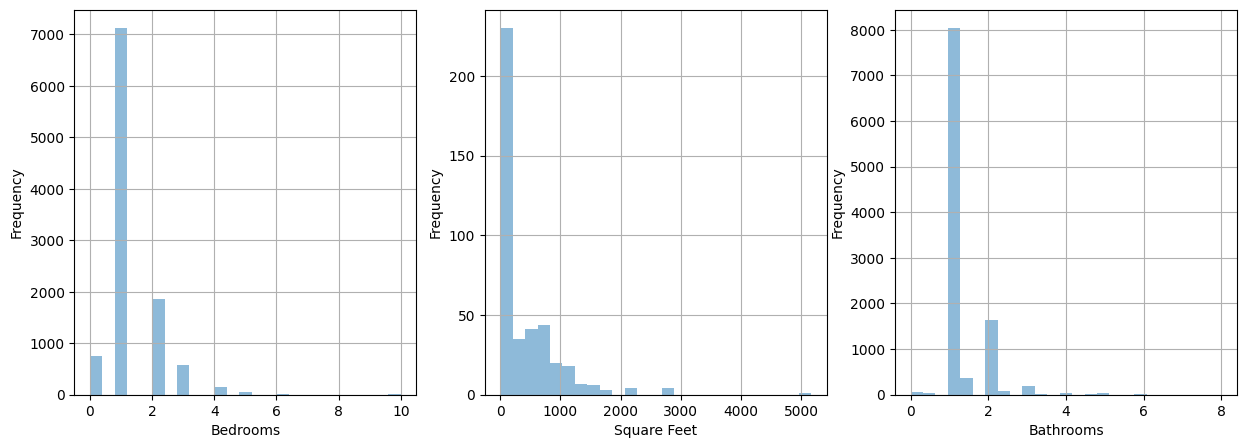

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_train_df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_train_df['Square Feet'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.yscale("log")
plt.xlabel('Square Feet')

plt.subplot(1,3,3)
airbnb_train_df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.show()

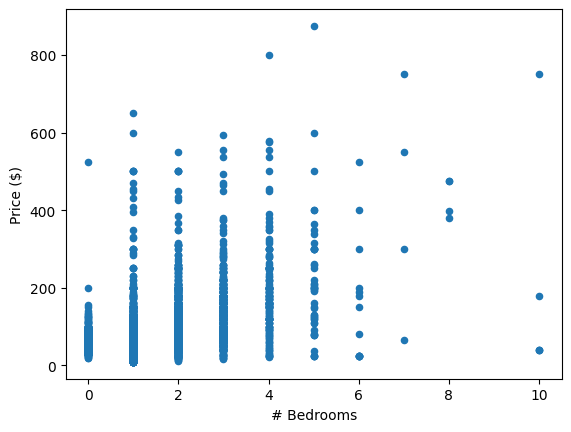

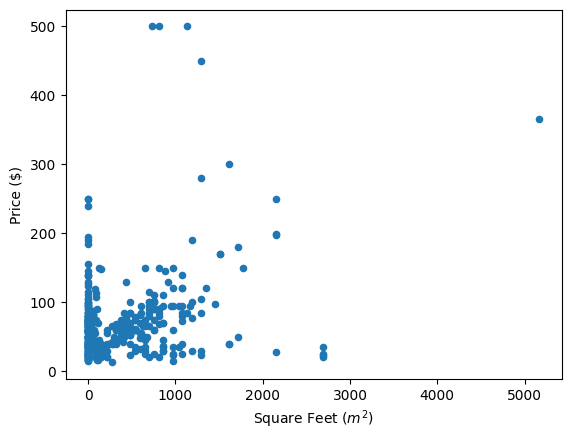

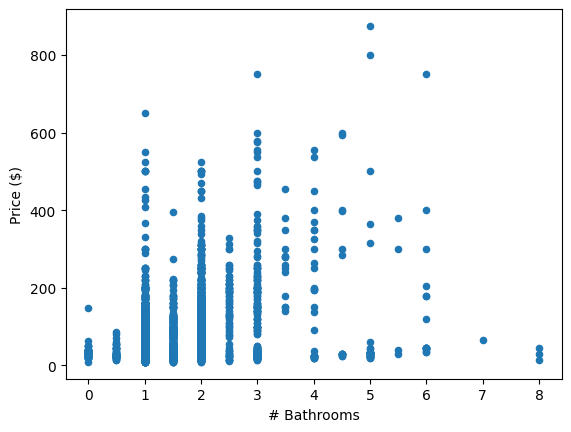

In [24]:
# Sólo representamos 3: Bedrooms, Square Feet y Bathrooms
# el resto se puede repetir una a una

airbnb_train_df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

airbnb_train_df.plot(kind = 'scatter',x='Square Feet',y = 'Price')
plt.xlabel('Square Feet ($m^2$)')
plt.ylabel('Price ($)')
plt.show()

airbnb_train_df.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price ($)')
plt.show()

In [25]:
airbnb_train_df['Bedrooms'].value_counts()

Bedrooms
1.0     7123
2.0     1856
0.0      751
3.0      585
4.0      159
5.0       48
6.0       14
10.0       5
8.0        4
7.0        4
Name: count, dtype: int64

In [26]:
airbnb_train_df['Bathrooms'].value_counts()

Bathrooms
1.0    8037
2.0    1636
1.5     362
3.0     192
2.5      77
0.0      52
0.5      48
5.0      37
4.0      31
6.0      18
4.5      15
3.5      14
5.5       4
8.0       3
7.0       1
Name: count, dtype: int64

In [27]:
airbnb_train_df['Square Feet'].value_counts()

Square Feet
0.0       165
484.0      14
646.0      12
753.0      10
700.0       9
         ... 
71.0        1
549.0       1
1453.0      1
5167.0      1
22.0        1
Name: count, Length: 77, dtype: int64

#### Eliminación de outliers

Tanto con los scatter plot de arriba como con los análisis de `value_counts`, vemos que hay unos pocos outliers en la variable Bedrooms y en Bathrooms.
Vamos a eliminarlos con un filtro:

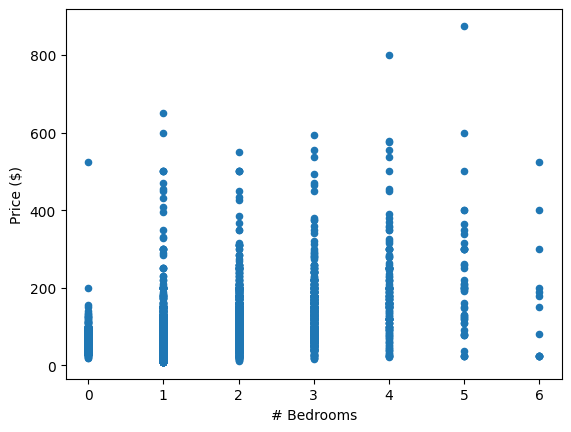

In [28]:
airbnb_train_df_no_outliers_bedrooms = airbnb_train_df[airbnb_train_df['Bedrooms'] <= 6]

airbnb_train_df_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

In [29]:
print(
    f'Original: {airbnb_train_df.shape[0]} // '
    f'Modificado: {airbnb_train_df_no_outliers_bedrooms.shape[0]}\nDiferencia: {airbnb_train_df.shape[0] - airbnb_train_df_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((airbnb_train_df.shape[0] - airbnb_train_df_no_outliers_bedrooms.shape[0])/airbnb_train_df.shape[0])*100:2f}%')

Original: 10567 // Modificado: 10536
Diferencia: 31
Variación: 0.293366%


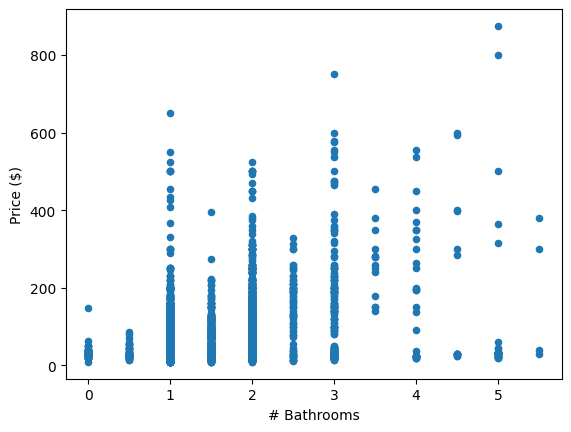

In [30]:
airbnb_train_df_no_outliers_bathrooms = airbnb_train_df[airbnb_train_df['Bathrooms'] <= 5.5]

airbnb_train_df_no_outliers_bathrooms.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price ($)')
plt.show()

In [31]:
print(
    f'Original: {airbnb_train_df.shape[0]} // '
    f'Modificado: {airbnb_train_df_no_outliers_bathrooms.shape[0]}\nDiferencia: {airbnb_train_df.shape[0] - airbnb_train_df_no_outliers_bathrooms.shape[0]}'
)
print(f'Variación: {((airbnb_train_df.shape[0] - airbnb_train_df_no_outliers_bathrooms.shape[0])/airbnb_train_df.shape[0])*100:2f}%')

Original: 10567 // Modificado: 10505
Diferencia: 62
Variación: 0.586732%


In [32]:
!pip install seaborn

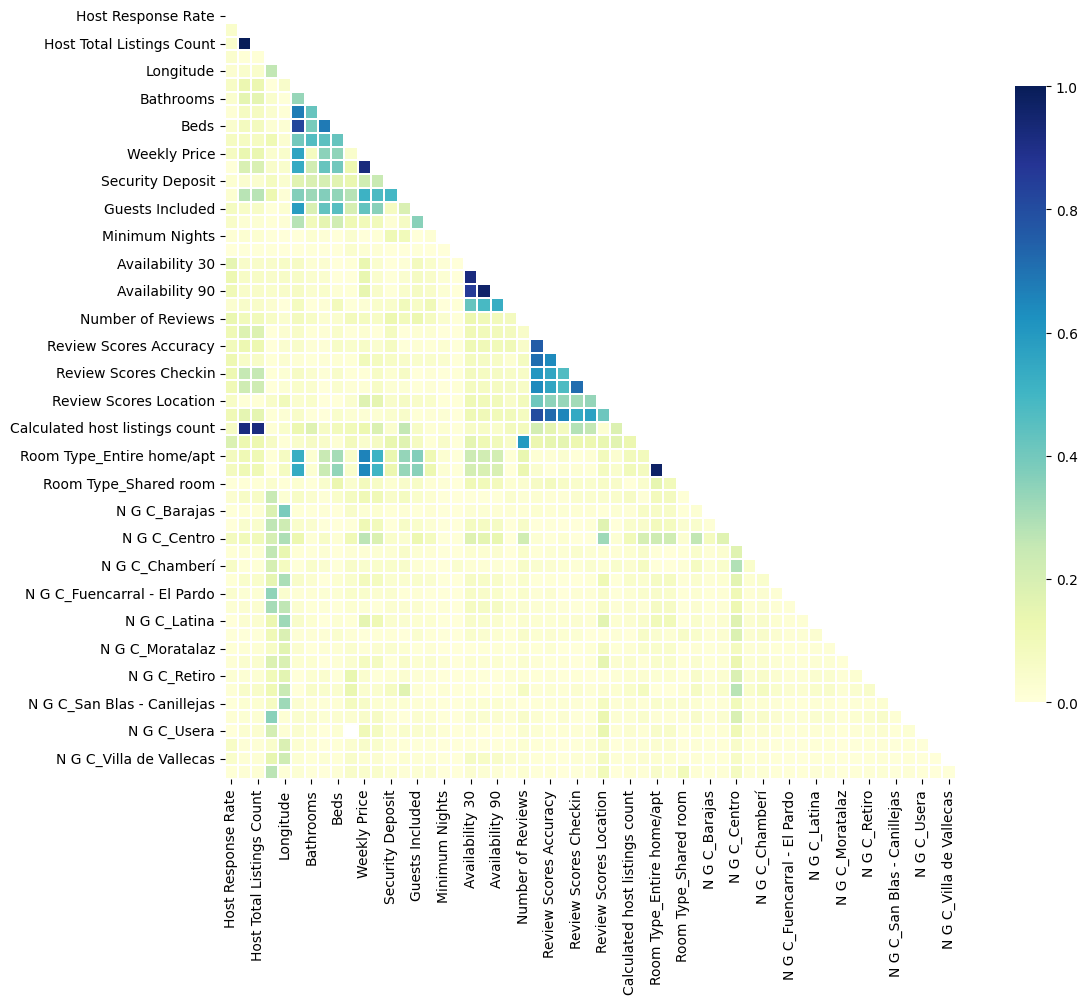

In [33]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_train_df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

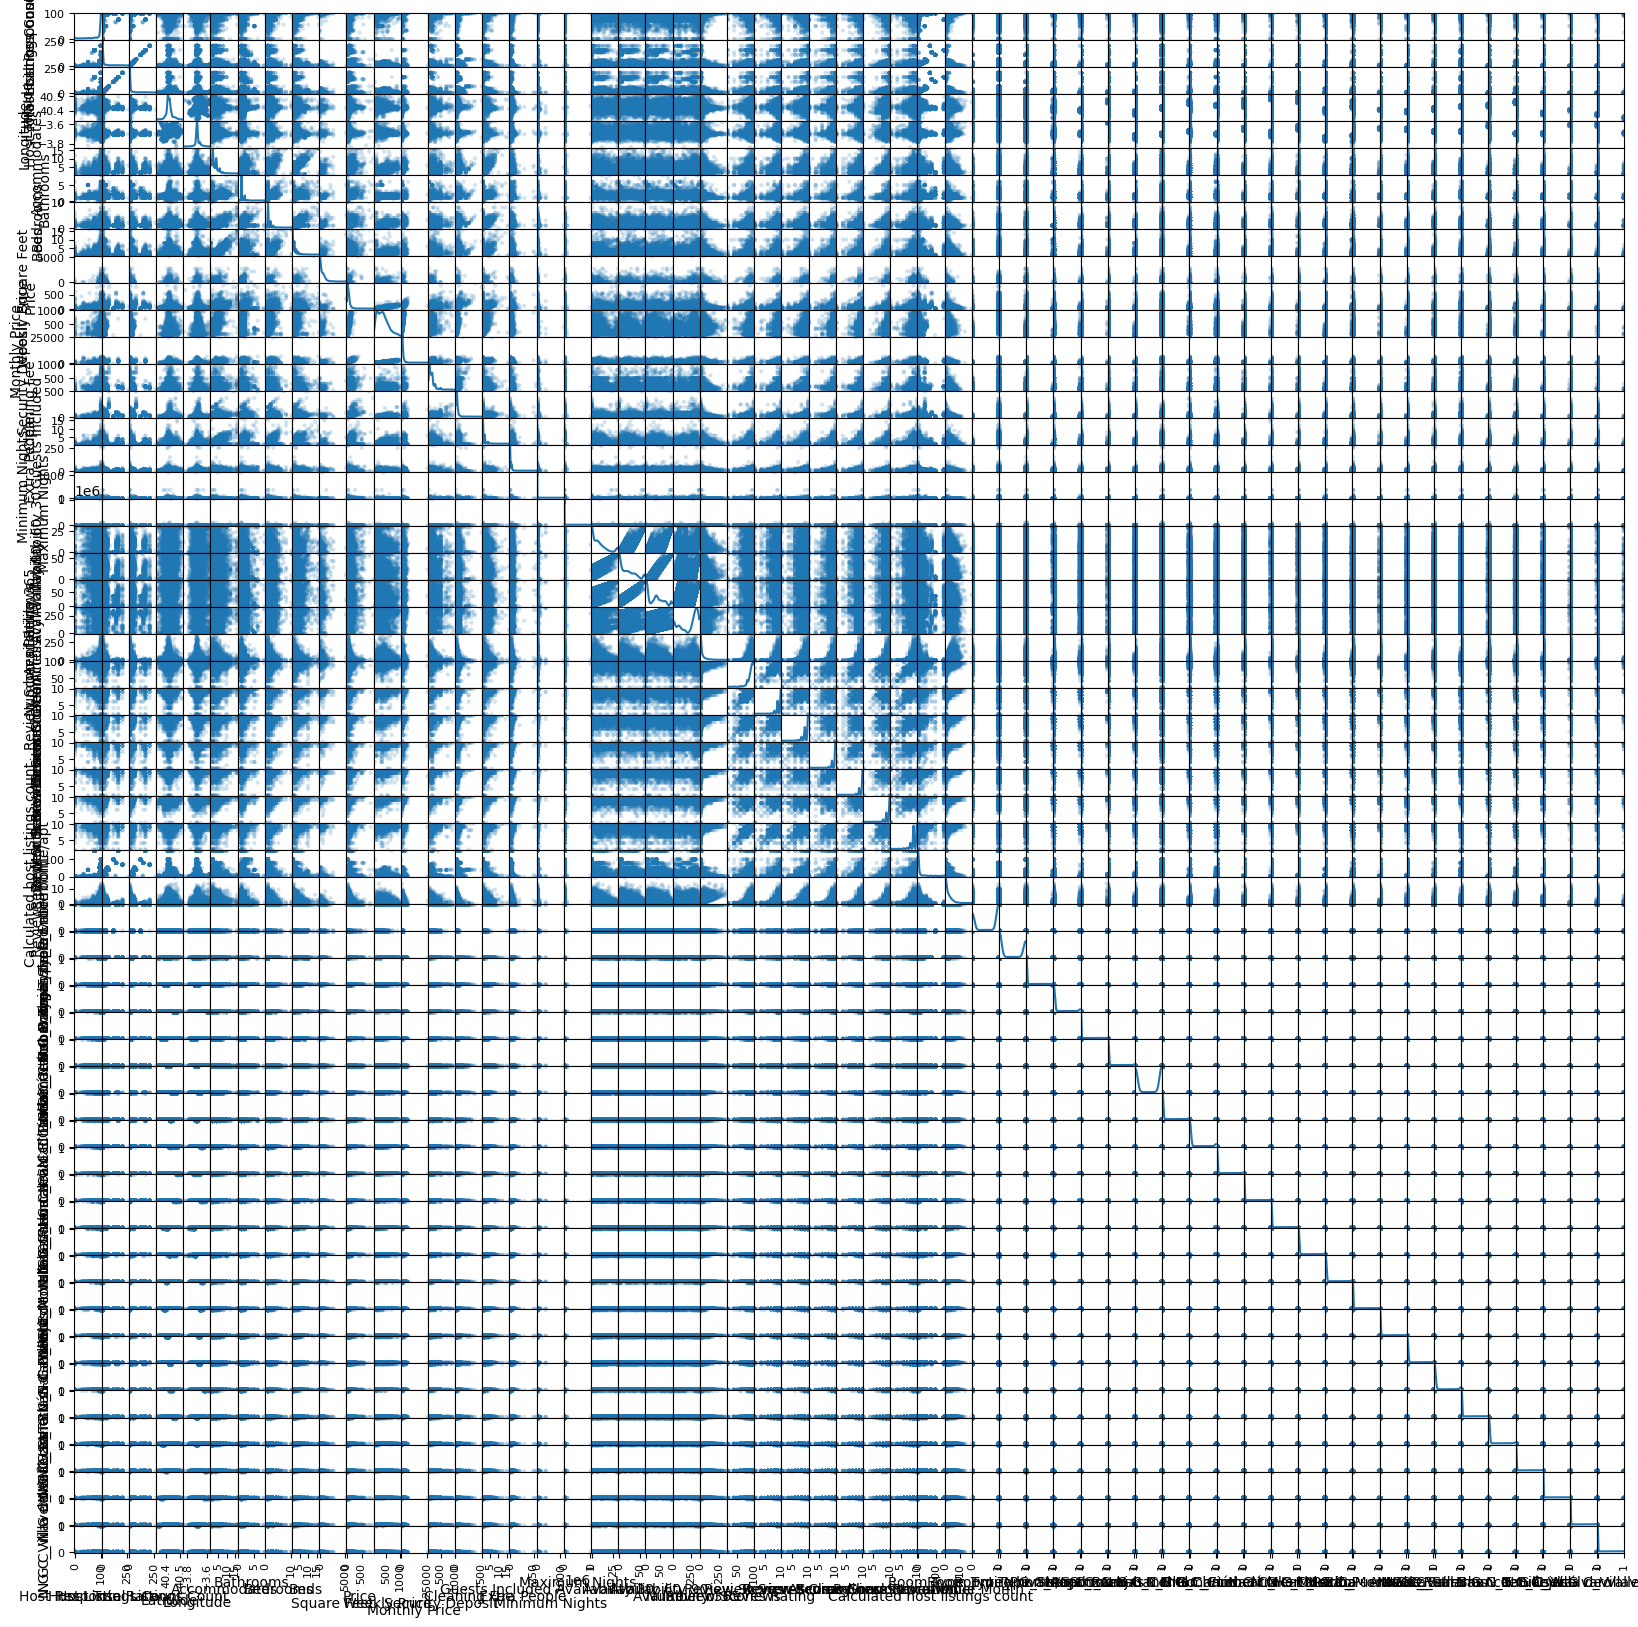

In [34]:
pd.plotting.scatter_matrix(airbnb_train_df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [35]:
# Elimino la columnas Square Feet
airbnb_train_df = airbnb_train_df.drop(['Square Feet'], axis=1)
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,89.000000,100.000000,79.000000,100.000000,100.000000
Host Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000,1.000000,1.000000,114.000000,28.000000,4.000000,8.000000,2.000000,2.000000,4.000000,1.000000
Host Total Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000,1.000000,1.000000,114.000000,28.000000,4.000000,8.000000,2.000000,2.000000,4.000000,1.000000
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.411880,40.415087,40.418266,40.426410,40.408683,40.426880,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.700160,-3.667827,-3.678202,-3.706216,-3.722286,-3.698600
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
Price,60.000000,50.000000,10.000000,30.000000,32.000000,35.000000,80.000000,25.000000,158.000000,29.000000,85.000000,52.000000,55.000000,39.000000,65.000000


## 4. Generación de nuevas características

Este sería el momento de pensar sobre otras variables que tuvieran sentido:

- Relación entre dormitorios y baños
- Elevar al cuadrado el número de dormitorios era una variable relevante; la explicación (o eso se cree) es que muchas de estas casas habían subdividido habitaciones para poder introducir a más inquilinos, 
a veces incluso a costa de las zonas comunes. Por tanto, un número de dormitorios mayor era mejor _hasta cierto punto_, lo cual quedaba recogido al elevar al cuadrado.
- Relación entre capacidad de personas y baños.

In [36]:
airbnb_train_df['Bedrooms_Squared'] = airbnb_train_df['Bedrooms'].apply(lambda x: x**2)
airbnb_train_df['Bed_Bath_Rooms']   = airbnb_train_df['Bedrooms']*airbnb_train_df['Bathrooms']
airbnb_train_df['Bathrooms_Accommodates']   = airbnb_train_df['Bathrooms']/airbnb_train_df['Accommodates']
airbnb_train_df.head(15).T

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,89.000000,100.000000,79.000000,100.000000,100.000000
Host Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000,1.000000,1.000000,114.000000,28.000000,4.000000,8.000000,2.000000,2.000000,4.000000,1.000000
Host Total Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000,1.000000,1.000000,114.000000,28.000000,4.000000,8.000000,2.000000,2.000000,4.000000,1.000000
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631,40.411880,40.415087,40.418266,40.426410,40.408683,40.426880,40.417231,40.410093,40.429345,40.408427
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716,-3.702481,-3.710994,-3.705617,-3.673278,-3.700160,-3.667827,-3.678202,-3.706216,-3.722286,-3.698600
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
Price,60.000000,50.000000,10.000000,30.000000,32.000000,35.000000,80.000000,25.000000,158.000000,29.000000,85.000000,52.000000,55.000000,39.000000,65.000000


## 5. Modelado, cross-validation y estudio de resultados en train y test

Ha llegado el gran momento! Antes de modelar, tenemos que cargar los datos de test y aplicar exactamente las mismas transformaciones. Es buena práctica, llegado este momento, combinar todo nuestro preprocesamiento
en una única celda:

In [49]:
# Carga de datos
airbnb_train_df = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')

# Filtrar los registros donde la columna 'City' es 'Madrid'
airbnb_train_df = airbnb_train_df[airbnb_train_df['City'] == 'Madrid']

# Elimino la columnas City
airbnb_train_df = airbnb_train_df.drop(['City'], axis=1)

# Crear columnas binarias para cada tipo Room Type y Neighbourhood Group Cleansed
room_type_dummies = pd.get_dummies(airbnb_train_df['Room Type'], prefix='Room Type')
neighbourhood_dummies = pd.get_dummies(airbnb_train_df['Neighbourhood Group Cleansed'], prefix='N G C')

# Unir las nuevas columnas al DataFrame original
airbnb_train_df = pd.concat([airbnb_train_df, room_type_dummies, neighbourhood_dummies], axis=1)

# Elimino la columnas Room Type y Neighbourhood Group Cleansed
airbnb_train_df = airbnb_train_df.drop(['Room Type', 'Neighbourhood Group Cleansed'], axis=1)

# Convertir las columnas que he creado que son booleanas en numericas. 
#Seleccionar todas las columnas de tipo booleano
bool_cols = airbnb_train_df.select_dtypes(include='bool').columns

# Verificar si hay columnas booleanas antes de convertir
if not bool_cols.empty:
    # Convertir esas columnas booleanas a numéricas (0 y 1)
    airbnb_train_df[bool_cols] = airbnb_train_df[bool_cols].astype(int)

# Imputar los NaN de la columna 'Price' con la mediana
airbnb_train_df['Price'] = airbnb_train_df['Price'].fillna(airbnb_train_df['Price'].median())

# Eliminamos outliers
airbnb_train_df = airbnb_train_df[airbnb_train_df['Bedrooms'] <= 6]
airbnb_train_df = airbnb_train_df[airbnb_train_df['Bathrooms'] <= 5.5]

# Elimino la columnas Square Feet
airbnb_train_df = airbnb_train_df.drop(['Square Feet'], axis=1)

# Generamos características
airbnb_train_df['Bedrooms_Squared'] = airbnb_train_df['Bedrooms'].apply(lambda x: x**2)
airbnb_train_df['Bed_Bath_Rooms'] = airbnb_train_df['Bedrooms']*airbnb_train_df['Bathrooms']
#airbnb_train_df['Bathrooms_Accommodates'] = airbnb_train_df['Accommodates']/airbnb_train_df['Bathrooms']
# Evitar la división por 0, reemplazando por np.nan en esos casos
airbnb_train_df['Bathrooms_Accommodates'] = np.where(airbnb_train_df['Accommodates'] == 0, 
                                                    np.nan, 
                                                    airbnb_train_df['Bathrooms'] / airbnb_train_df['Accommodates'])


Y ahora aplicamos fácilmente a test:

In [50]:
# Carga de datos
airbnb_test_df = pd.read_csv('./data/airbnb_test.csv', sep=';', decimal='.')

# Filtrar los registros donde la columna 'City' es 'Madrid'
airbnb_test_df = airbnb_test_df[airbnb_test_df['City'] == 'Madrid']

# Elimino la columnas City
airbnb_test_df = airbnb_test_df.drop(['City'], axis=1)

# Crear columnas binarias para cada tipo Room Type y Neighbourhood Group Cleansed
room_type_dummies = pd.get_dummies(airbnb_test_df['Room Type'], prefix='Room Type')
neighbourhood_dummies = pd.get_dummies(airbnb_test_df['Neighbourhood Group Cleansed'], prefix='N G C')

# Unir las nuevas columnas al DataFrame original
airbnb_test_df = pd.concat([airbnb_test_df, room_type_dummies, neighbourhood_dummies], axis=1)

# Elimino la columnas Room Type y Neighbourhood Group Cleansed
airbnb_test_df = airbnb_test_df.drop(['Room Type', 'Neighbourhood Group Cleansed'], axis=1)

# Convertir las columnas que he creado que son booleanas en numericas. 
#Seleccionar todas las columnas de tipo booleano
bool_cols = airbnb_test_df.select_dtypes(include='bool').columns

# Verificar si hay columnas booleanas antes de convertir
if not bool_cols.empty:
    # Convertir esas columnas booleanas a numéricas (0 y 1)
    airbnb_test_df[bool_cols] = airbnb_test_df[bool_cols].astype(int)

# Imputar los NaN de la columna 'Price' con la mediana
airbnb_test_df['Price'] = airbnb_test_df['Price'].fillna(airbnb_test_df['Price'].median())

# Eliminamos outliers
airbnb_test_df = airbnb_test_df[airbnb_test_df['Bedrooms'] <= 6]
airbnb_test_df = airbnb_test_df[airbnb_test_df['Bathrooms'] <= 5.5]

# Elimino la columnas Square Feet
airbnb_test_df = airbnb_test_df.drop(['Square Feet'], axis=1)

# Generamos características
airbnb_test_df['Bedrooms_Squared'] = airbnb_test_df['Bedrooms'].apply(lambda x: x**2)
airbnb_test_df['Bed_Bath_Rooms'] = airbnb_test_df['Bedrooms']*airbnb_test_df['Bathrooms']
#airbnb_test_df['Bathrooms_Accommodates'] = airbnb_test_df['Accommodates']/airbnb_test_df['Bathrooms']
# Evitar la división por 0, reemplazando por np.nan en esos casos
airbnb_test_df['Bathrooms_Accommodates'] = np.where(airbnb_test_df['Accommodates'] == 0, 
                                                    np.nan, 
                                                    airbnb_test_df['Bathrooms'] / airbnb_test_df['Accommodates'])


Ahora podemos preparar los datos para sklearn:

In [51]:
from sklearn import preprocessing
import numpy as np

# Dataset de train
data_train = airbnb_train_df.values
y_train = airbnb_train_df['Price'].values.ravel()    # Seleccionamos la columna Price
X_train = airbnb_train_df.drop('Price', axis=1).values  # Eliminamos la columna Prime de X_train

feature_names = airbnb_train_df.drop('Price', axis=1).columns

# Dataset de test
data_test = airbnb_test_df.values
y_test = airbnb_test_df['Price'].values.ravel()     # Seleccionamos la columna Price
X_test = np.delete(data_test, 9, axis=1)  # Eliminamos la columna Price de X_test

# Verificación de shapes
print("Shape de y_train:", y_train.shape)
print("Shape de X_train:", X_train.shape)
print("Shape de y_test:", y_test.shape)
print("Shape de X_test:", X_test.shape)

Shape de y_train: (10479,)
Shape de X_train: (10479, 58)
Shape de y_test: (2619,)
Shape de X_test: (2619, 58)


Normalizamos, pero con los datos de train!

In [52]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10479, 58)
Datos test:  (2619, 58)


Cross validation, búsqueda de los parámetros óptimos, visualización de performance vs complejidad...

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=1; total time=   0.7s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=2; total time=   1.3s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=3; total time=   1.6s
[CV] END .......................................

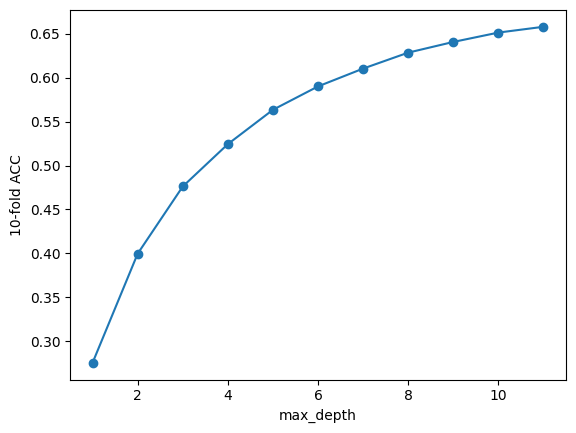

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  # Importar GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

maxDepth = range(1,12)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train.ravel())

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [60]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.8322535356459143
Test:  0.6266548183167197


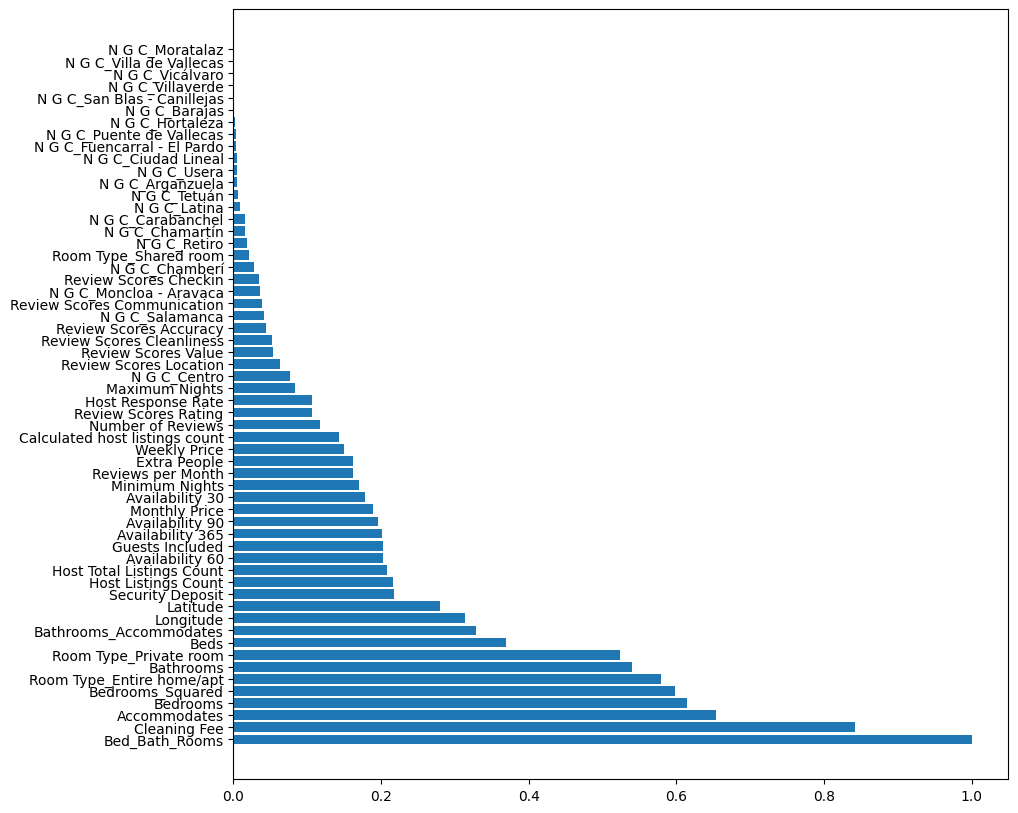

In [58]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
# Conclusión:
# Conclusión:
Tengo un gran score en el conjunto de entrenamiento (0.83), pero un score muy bajo en el conjunto de prueba (0.62). 
Esto sugiere que el modelo podría estar sobreajustando (overfitting) con los datos de entrenamiento. Estoy intendo reducir el (overfitting) usando log_Price.